Here We are going to perform Deep Learning approach and see that how this is going to predict the future data of like counts

*specifically we are going to perform ANN(Artificial Neuaral Network Technique)*

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [2]:
df1 = pd.read_csv("Filtered-1.csv")

In [3]:
X = df1[['Genre','views','dislikes','comment_count']]

In [4]:
y = df1['likes']

We are using the same OneHotEncoder Technique because it is producing good reesult for our data

In [5]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()

In [6]:
enc = oh.fit_transform(df1[['Genre']]).toarray()

In [7]:
encode = pd.DataFrame(enc)

In [8]:
for i in range(15):
  df1[i]=encode[i].values

  

In [9]:
df1




,t_day,t_month,t_year,Genre,views,likes,dislikes,comment_count,0,1,...,5,6,7,8,9,10,11,12,13,14
0,1,1,1,Science & Technology,3237,161,2,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6,6,6,People & Blogs,43012,754,87,123,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4,4,4,Science & Technology,3635,84,3,21,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,1,Music,2152261,7824,158,324,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,4,Entertainment,140520,1852,33,113,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,4,4,4,People & Blogs,300769,8595,150,2802,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6451,8,8,8,People & Blogs,157819,19559,52,1962,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6452,7,7,7,Howto & Style,193794,7547,78,824,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6453,8,8,8,People & Blogs,193223,8141,302,1226,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
X = df1.drop(['t_day','t_month','t_year','likes','Genre'],axis = 1)

In [11]:
y = df1['likes']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)


Here We are Importing our Libraries for neural networking that is Keras and Tensorflow

In [13]:
from tensorflow import keras
import tensorflow as tf

Here We are Creating a Neuaral Network according to the behaviour of our dataset

In [14]:
model = keras.Sequential([
    keras.layers.Dense(512,input_dim = X_train.shape[1],kernel_initializer = 'normal',activation='relu'),
    keras.layers.Dense(512,kernel_initializer = 'normal',activation='relu'),
    keras.layers.Dense(256,kernel_initializer = 'normal',activation='relu'),
    keras.layers.Dense(256,kernel_initializer = 'normal',activation='relu'),
    keras.layers.Dense(128,kernel_initializer = 'normal',activation='relu'),
    keras.layers.Dense(1,kernel_initializer = 'normal',activation='linear'),

])

Here we are creating 6 layers of neural network

In [15]:
# Hyperparameter
# Number of Neorons 
# activation function
# number of layers of network

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               9728      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 502,529
Trainable params: 502,529
Non-trai

Here we can see that first we have input layer in which we will pass our input feature

In First Layer we have taken 512 neurons

In Second Layer we have taken 512 neurons

In third Layer we have taken 256 neurons

In fourth Layer we have taken 256 neurons

In fifth Layer we have taken 128 neurons

In Sixth Layer we have taken 1 neurons

In [17]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

Here we are taking loss function as MeanAbsoluteError

Here we are taking optimizers as adam

Metrics we aare taking as MeanAbsoluteError

In [18]:
model.fit(X_train,y_train,epochs = 100,validation_split=0.5)

c:\Users\singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
76/76 [==============================] - 6s 31ms/step - loss: 32294.1914 - mean_absolute_error: 32294.1914 - val_loss: 30033.0801 - val_mean_absolute_error: 30033.0801
Epoch 2/100
76/76 [==============================] - 1s 19ms/step - loss: 29580.1875 - mean_absolute_error: 29580.1875 - val_loss: 29669.2871 - val_mean_absolute_error: 29669.2871
Epoch 3/100
76/76 [==============================] - 1s 20ms/step - loss: 29774.5684 - mean_absolute_error: 29774.5684 - val_loss: 29797.3770 - val_mean_absolute_error: 29797.3770
Epoch 4/100
76/76 [==============================] - 1s 18ms/step - loss: 29095.3750 - mean_absolute_error: 29095.3750 - val_loss: 29627.0801 - val_mean_absolute_error: 29627.0801
Epoch 5/100
76/76 [==============================] - 1s 17ms/step - loss: 30774.3047 - mean_absolute_error: 30774.3047 - val_loss: 41521.3867 - val_mean_absolute_error: 41521.3867
Epoch 6/100
76/76 [==============================] - 1s 16ms/step - loss: 29433.4277 - mean_absolute

In [19]:
model.history.history

{'loss': [32294.19140625,
  29580.1875,
  29774.568359375,
  29095.375,
  30774.3046875,
  29433.427734375,
  28864.333984375,
  29546.96484375,
  27948.634765625,
  28630.40625,
  28482.390625,
  28665.89453125,
  27844.625,
  29107.060546875,
  27379.138671875,
  27578.5,
  26471.529296875,
  25849.111328125,
  25623.294921875,
  27226.7734375,
  25257.041015625,
  23832.80078125,
  28386.310546875,
  26796.486328125,
  24695.505859375,
  24901.720703125,
  25337.8125,
  24839.00390625,
  24305.220703125,
  23274.34375,
  23793.47265625,
  25581.435546875,
  23538.9921875,
  24611.99609375,
  23334.029296875,
  24728.423828125,
  23031.654296875,
  23626.318359375,
  23433.046875,
  23985.833984375,
  22604.54296875,
  24284.4375,
  25120.0234375,
  23442.533203125,
  26361.986328125,
  22645.05859375,
  23053.404296875,
  22301.951171875,
  22335.98828125,
  21975.7734375,
  24557.0390625,
  24140.8671875,
  23908.1171875,
  21920.822265625,
  22646.2734375,
  20941.423828125,
  229

In [20]:
y_pred = model.predict(X_test)

51/51 [==============================] - 1s 5ms/step


<AxesSubplot: xlabel='views'>

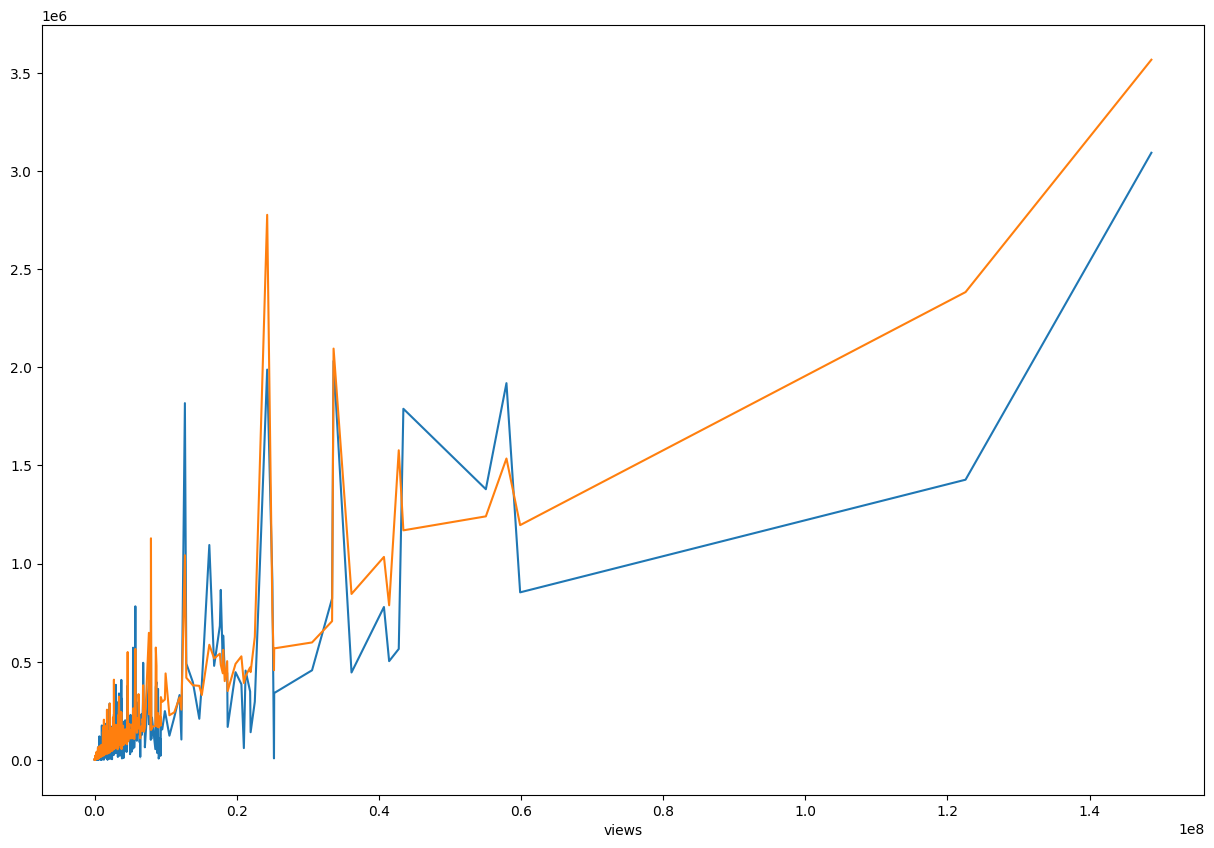

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(x = X_test['views'],y = y_test.values)
sns.lineplot(x = X_test['views'],y = y_pred.reshape(1,-1)[0])

As we can Clearly see that our Deeplearning model is predecting a good result as compared to the random forest result

If we want more accuracy from our model we have to make and try more hyperparameters

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_true = y_test,y_pred = y_pred)

In [23]:
score

0.829289079246262

In [24]:
model.save('DeepLearningModel')

INFO:tensorflow:Assets written to: DeepLearningModel\assets


INFO:tensorflow:Assets written to: DeepLearningModel\assets


In [25]:
x = widgets.IntSlider(
    value=7,
    min=0,
    max=10000000,
    step=1,
    description='Views:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='d'
)
y = widgets.IntSlider(
    value=7,
    min=0,
    max=100000,
    step=1,
    description='dislike:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='d'
)


z = widgets.IntSlider(
    value=7,
    min=0,
    max=10000,
    step=1,
    description='comment_count:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='d'
)


k = widgets.Dropdown(
    options=list(df1['Genre'].unique()),
    value=None,
    description='Genre:',
    disabled=False,
)
view = []
dis = []
com = []
Gen = []

def view_take(vi):
  view.clear()
  view.append(vi)

def dislike_take(di):
  dis.clear()
  dis.append(di)
def comment_take(ci):
  com.clear()
  com.append(ci)
def Genre_take(gi):
  print(gi)
  # ty = np.array(df1.loc[[0],0:][df1['Genre']==gi])
  ty = np.array(df1.loc[:,0:][df1['Genre']==gi])[0]
  Gen.clear()
  Gen.append(list(ty))




In [26]:
widgets.interact(view_take,vi=x)
widgets.interact(dislike_take,di=y)
widgets.interact(comment_take,ci=z)
widgets.interact(Genre_take,gi=k)

interactive(children=(IntSlider(value=7, continuous_update=False, description='Views:', max=10000000, orientat…

interactive(children=(IntSlider(value=7, continuous_update=False, description='dislike:', max=100000, orientat…

interactive(children=(IntSlider(value=7, continuous_update=False, description='comment_count:', max=10000, ori…

interactive(children=(Dropdown(description='Genre:', options=('Science & Technology', 'People & Blogs', 'Music…

<function __main__.Genre_take(gi)>

In [ ]:

def pred():
    pred_value = model.predict([view+dis+com+Gen[0]])
    print('Probable Likes got is -----',int(pred_value))
    return int(pred_value)

widgets.IntProgress(
    value=pred(),
    min=0,
    max=100000,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    style={'bar_color': 'maroon'},
    orientation='vertical'
    )

1/1 [==============================] - 0s 270ms/step
Probable Likes got is ----- 14285


IntProgress(value=14285, description='Loading:', max=100000, orientation='vertical', style=ProgressStyle(bar_c…